In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
AA3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K','ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W','ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
AA1to3 = {}
for i in range(len(list(AA3to1.keys()))):
    AA1to3[list(AA3to1.values())[i]] = list(AA3to1.keys())[i]

In [3]:
AA = 'SSGLVPRGSHMRGPNPTAASLEASAGPFTVRSFTVSRPSGYGAGTVYYPTNAGGTVGAIAIVPGYTARQSSIKWWGPRLASHGFVVITIDTNSTLDQPSSRSSQQMAALRQVASLNGTSSSPIYGKVDTARMGVMGWSMGGGGSLISAANNPSLKAAAPQAPWDSSTNFSSVTVPTLIFACENDSIAPVNSSALPIYDSMSRNAKQFLEINGGSHSCANSGNSNQALIGKKGVAWMKRFMDNDTRYSTFACENPNSTRVSDFRTANCSLEDPAANKARKEAELAAATAEQ'
Am = list(AA)
Am3 = []
for i in range(len(Am)):
    Am3.append(AA1to3[Am[i]])

In [4]:
CodonDict={'ATT':'I',   'ATC':'I',  'ATA':'I',  'CTT':'L',  'CTC':'L',  
'CTA':'L',  'CTG':'L',  'TTA':'L',  'TTG':'L',  'GTT':'V',  'GTC':'V',  
'GTA':'V',  'GTG':'V',  'TTT':'F',  'TTC':'F',  'ATG':'M',  'TGT':'C',  
'TGC':'C',  'GCT':'A',  'GCC':'A',  'GCA':'A',  'GCG':'A',  'GGT':'G',  
'GGC':'G',  'GGA':'G',  'GGG':'G',  'CCT':'P',  'CCC':'P',  'CCA':'P',  
'CCG':'P',  'ACT':'T',  'ACC':'T',  'ACA':'T',  'ACG':'T',  'TCT':'S',  
'TCC':'S',  'TCA':'S',  'TCG':'S',  'AGT':'S',  'AGC':'S',  'TAT':'Y',  
'TAC':'Y',  'TGG':'W',  'CAA':'Q',  'CAG':'Q',  'AAT':'N',  'AAC':'N',  
'CAT':'H',  'CAC':'H',  'GAA':'E',  'GAG':'E',  'GAT':'D',  'GAC':'D',  
'AAA':'K',  'AAG':'K',  'CGT':'R',  'CGC':'R',  'CGA':'R',  'CGG':'R',  
'AGA':'R',  'AGG':'R',  'TAA':'X',  'TAG':'X',  'TGA':'X'}

In [5]:
AAtoGEN = {}
for i in range(len(list(CodonDict.keys()))):
    AAtoGEN[list(CodonDict.values())[i]] = list(CodonDict.keys())[i]

In [6]:
Gen = []
for i in range(len(Am)):
    Gen.append(AAtoGEN[Am[i]])

In [7]:
Gen = np.array(Gen)

In [8]:
def mutation(gen):
    g = ''.join(gen)
    idx = np.random.randint(len(g))
    a = ['A','T','G','C']
    i = np.random.randint(4)
    d = list(g)
    d[idx] = a[i]
    g = ''.join(d)
    p = []
    for i in range(0,len(g),3):
        p.append(CodonDict[g[i:i+3]])
    return ''.join(p), g

Gillespi

100000 7.798677610470901 0.003095760472833005
200000 11.121308468518357 0.006468586104926694
300000 14.423327242505872 0.009931713753073548
400000 17.735593043247615 0.013106723615500842
500000 21.036312941397558 0.016235034033761246
600000 24.335164122130145 0.019449119994574892
700000 27.64662684585518 0.022720365493321532
800000 30.96326196066425 0.02603820640408694
900000 34.27922171786026 0.029386388209282462
1000000 37.585327688608714 0.03294754759343381
1100000 40.894217169820756 0.036149546276436316
1200000 44.19941704281055 0.03963415691472656
1300000 47.499948583372735 0.04317875575929347


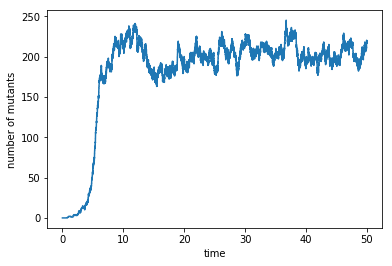

NXLVRSRSKRRRXIYLSRALICTKTDHRTFCVLLASLRSHLXRCVNIXXARLEVERAHGHPYGVNRTLPTYLXSXPILNTYPHNRGXVFRFASLHSRXIPTMSAFHFWHHIFHGLGVWERRXPQXGPXLDFREKMRLSTATSTLKRDILPLLXSMFSPRHYLYGVHQRHATNXGCXGPASGQLVRRDVQQASSIDPAAWTPSLMSYADDIAXXGVPYIATTWRLSGSQAQVNTRRFQLGRSCXTTTEFARGSSHTRIVEGLKDLWSIAXTVSVHVDNRLESVPEFWRNRK


<Figure size 432x288 with 0 Axes>

In [35]:
for k  in range(10):
    n_0 = 50
    ge = Gen
    n_max = 10000
    t = [0]
    pob = [0 for i in range(n_0)]
    n_mu = [0]
    t_mu = [0]
    j=0
    f=0
    i=1
    while(True):
        g = 2.0*len(pob) + pob.count(1) * f
        ga = len(pob)
        mu = g * 0.01 
        s = g + ga + mu
        t_new = -1/s * np.log(np.random.random())
        t.append(t[i-1]+t_new)

        alpha = np.random.random()
        if(g > alpha * s and len(pob)<=n_max):
            pob.append(0)
        if(ga > alpha * s):
            idx = np.random.randint(len(pob))
            pob.pop(idx)
        if(mu > alpha * s):
            p, ge1 = mutation(ge)
            if (p[64] == 'Y'or p[138] == 'M' or p[137] == 'S' ):
                ge = ge1
                pob.append(1)
                if (p[67] != 'R' or p[94] != 'L' or p[215] != 'S' or p[185] != 'I' or p[217] != 'A'):
                    f += 0.00001 * np.random.random()
                if (p[67] == 'A' or p[67] == 'V' or p[94] == 'V' or p[215] == 'F' or p[185] == 'F' or p[217] == 'P'):
                    f += 0.1 * np.random.random()  
        n_mu.append(pob.count(1)) 
        if(pob.count(1)>500 or t[i]>50):
            break
        if(i%100000 == 0):
            print(i,t[i],f)
        i+=1

    plt.plot(t,n_mu) 

    print(AA[67], AA[94], AA[215], AA[185], AA[217])
    print(p[67], p[94], p[215], p[185], p[217])

plt.xlabel('time')
plt.ylabel('number of mutants')
plt.show()
plt.savefig("mutants.pdf") 


R L S I A


L H P R I


In [38]:
len(pob)

10001